In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/kaggle/input/zomato/Zomato data .csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
df.shape

(148, 7)

In [4]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [5]:
df = df.drop(['name','book_table'], axis = 1)
df

,online_order,rate,votes,approx_cost(for two people),listed_in(type)
0,Yes,4.1/5,775,800,Buffet
1,Yes,4.1/5,787,800,Buffet
2,Yes,3.8/5,918,800,Buffet
3,No,3.7/5,88,300,Buffet
4,No,3.8/5,166,600,Buffet
...,...,...,...,...,...
143,No,3.3/5,0,100,Dining
144,No,3.3/5,0,150,Dining
145,Yes,4.0/5,771,450,Dining
146,No,3.0/5,98,800,Dining


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 148 non-null    object
 1   rate                         148 non-null    object
 2   votes                        148 non-null    int64 
 3   approx_cost(for two people)  148 non-null    int64 
 4   listed_in(type)              148 non-null    object
dtypes: int64(2), object(3)
memory usage: 5.9+ KB


In [7]:
# Convert 'rate' to a numeric value
df['rate'] = df['rate'].str.replace('/5', '').astype(float)

# Convert 'votes' to integer
df['votes'] = df['votes'].astype(int)

# Convert 'approx_cost(for two people)' to integer
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

# Display the cleaned DataFrame
print(df.head())

  online_order  rate  votes  approx_cost(for two people) listed_in(type)
0          Yes   4.1    775                          800          Buffet
1          Yes   4.1    787                          800          Buffet
2          Yes   3.8    918                          800          Buffet
3           No   3.7     88                          300          Buffet
4           No   3.8    166                          600          Buffet


             rate        votes  approx_cost(for two people)
count  148.000000   148.000000                   148.000000
mean     3.633108   264.810811                   418.243243
std      0.402271   653.676951                   223.085098
min      2.600000     0.000000                   100.000000
25%      3.300000     6.750000                   200.000000
50%      3.700000    43.500000                   400.000000
75%      3.900000   221.750000                   600.000000
max      4.600000  4884.000000                   950.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


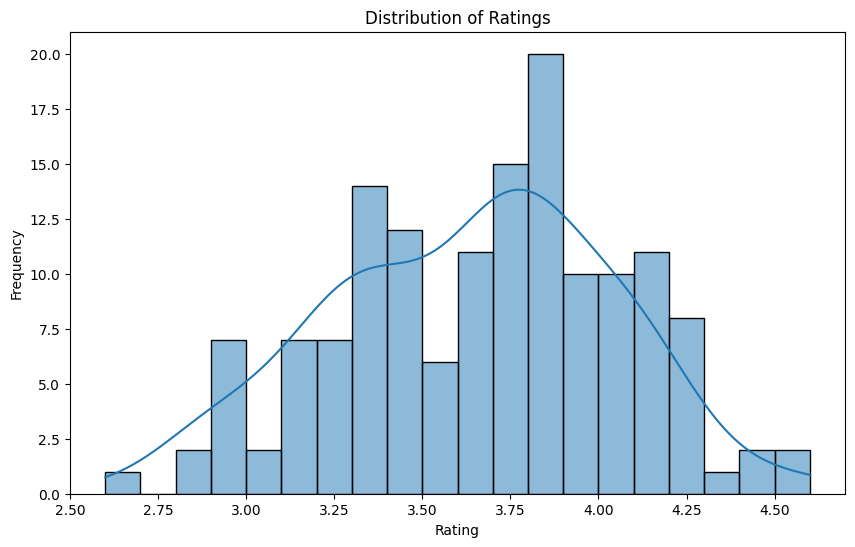

In [8]:
# Display basic statistics
print(df.describe())

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



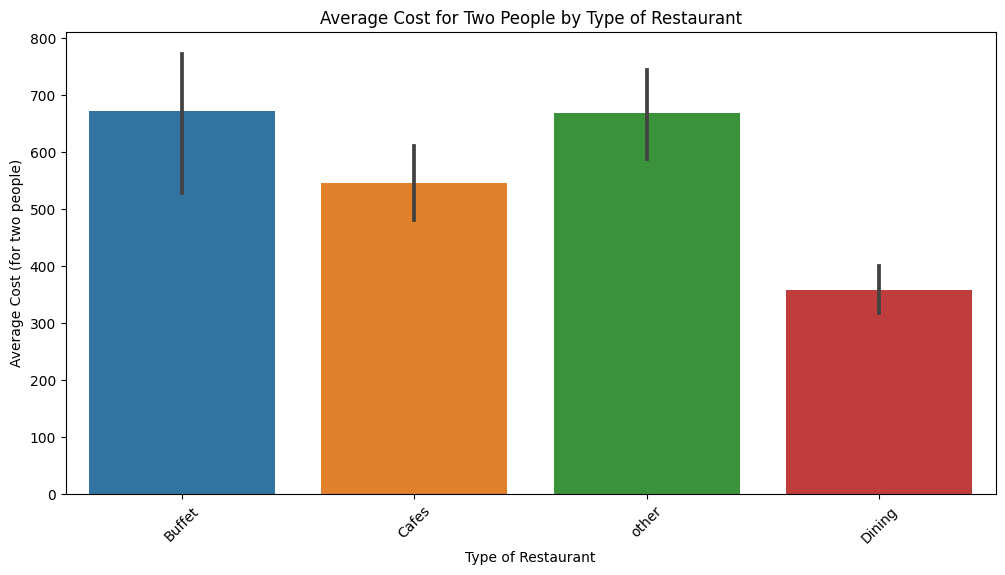

In [9]:
# Average cost for two people by type of restaurant
plt.figure(figsize=(12, 6))
sns.barplot(x='listed_in(type)', y='approx_cost(for two people)', data=df, estimator=np.mean)
plt.title('Average Cost for Two People by Type of Restaurant')
plt.xlabel('Type of Restaurant')
plt.ylabel('Average Cost (for two people)')
plt.xticks(rotation=45)
plt.show()

